# Práctica 1. Optimización restringida

In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import least_squares

## Ejercicio 1

 Dada la función $f(x) = x^2e^{−x^2}$, represéntala gráficamente y determina su mínimo en el intervalo [−3,2]
 mediante el método de la bisección. El criterio de convergencia es que la amplitud del intervalo sea menor
 que 0.001. Utiliza también el método de Newton, tomando como valores iniciales 2, 1.2, 0.5. El criterio de
 convergencia en este caso es que el valor absoluto de la primera derivada sea menor de 0.0001. Comenta lo
 que observas y el motivo de ello. ¿Qué alternativa propondrías?

In [41]:
def f(x):
    return x**2*np.exp(-x**2)

def f_prime(x):
    return -2*x*(x**2-1)*np.exp(-x**2)

In [46]:
def bisect_minimum(derivative, a, b, tol=0.0001, max_iter=100):

    if derivative(a) * derivative(b) >= 0:
        raise ValueError("Las derivadas en los extremos deben tener signos distintos.")

    iteration = 0

    while (b - a) > tol and iteration < max_iter:
        c = (a + b) / 2
        if derivative(c) == 0:
            return c
        elif derivative(c) * derivative(a) < 0:
            b = c
        else:
            a = c

        iteration += 1

    return (a + b) / 2

# Ejemplo pedido:
minimum = bisect_minimum(f_prime, -3, 2)
print("El máximo aproximado es", minimum) #Con este intervalo incial, la función estaría localizando el máximo localizado en x = -1

minimum = bisect_minimum(f_prime, -0.9, 0.9)
print("El mínimo aproximado es", minimum) #Al cambiar el intervalo de búsqueda, la función converge al mínimo en x =

El máximo aproximado es -0.9999923706054688
El mínimo aproximado es 0.0


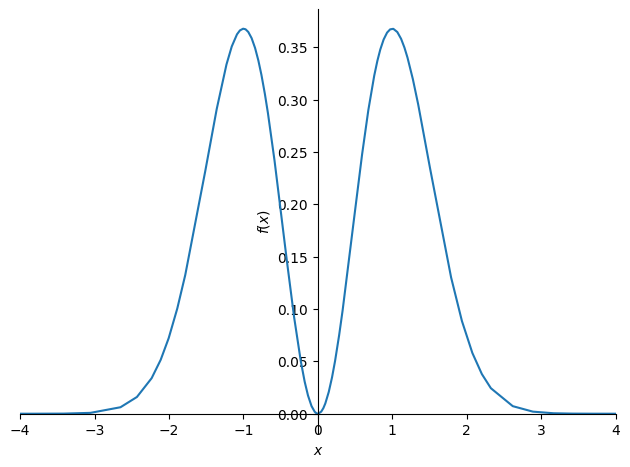

In [13]:
f2 = 'x**2*exp(-x**2)'
x = sp.symbols('x')

def sympy_plot(f, x):
    
    if isinstance(f2, str):
        f = sp.sympify(f)

    p1 = sp.plotting.plot(f, show = True, xlim = (-4, 4))

sympy_plot(f2, x)

In [31]:
f2 = 'x**2*exp(-x**2)'

def newton_optimization_1d(f, x0, tol = 1e-6, max_iter = 100):
    
    x = sp.symbols('x')
    
    f_expr = sp.sympify(f)
    
    f_prime = f_expr.diff(x)
    f_double_prime = f_prime.diff(x)
    
    x_current = x0
    iteration = 0
    
    while iteration < max_iter:
        df_prime = f_prime.subs(x, x_current)
        df_double_prime = f_double_prime.subs(x, x_current)
        
        x_new = x_current - df_prime / df_double_prime # iteración
        
        if abs(x_new - x_current) < tol: # salida por tolerancia
            
            second_derivative = df_double_prime.subs(x, x_new)
            
            if second_derivative > 0:
                print(f"Minimum found at x = {x_new}")
            elif second_derivative < 0:
                print(f"Maximum found at x = {x_new}")
            else:
                print(f"Saddle point found at x = {x_new}")
                
            return x_new
        
        x_current = x_new
        iteration += 1
        
        
    return x_current

minimo2 = newton_optimization_1d(f2, 2.0, tol = 0.0001)
print("El mínimo de la función partiendo de x = 2 se encuentra en x=", minimo2, ". El algoritmo no converge.")

#Como podemos observar, al comenzar en x = 2, la función no es capaz de converger a ningún punto
# de inflexión. Es más, si aumentamos el número de iteraciones la supuesta posición del mínimo 
# tiende a números cada vez más grandes

print("El punto de inflexión comenzando en x = 1.2 es: ")
minimo1_2 = newton_optimization_1d(f2, 1.2, tol = 0.0001)

# Al comenzar en x = 1.2 el algoritmo se encuentra muy cerca del máximo local en x = 1, por lo tanto
# converge a este punto. Al contrario que los otros dos puntos de partida, en este caso el algoritmo sí qiue converge

minimo0_5 = newton_optimization_1d(f2, 0.5, tol = 0.0001)
print("El mínimo de la función partiendo de x = 0.5 se encuentra en x=", minimo0_5, ". El algoritmo no converge.")

# Al comenzar en x = 0.5 el algoritmo en la primera iteración pasa a la derecha del primer máximo, 
# ya que en ese punto tiene primera derivada negativa y segunda positiva. Una vez pasa de x = 1 y se
# aleja, observamos el mismo comportamiento que cuando comenzamos en x = 2

El mínimo de la función partiendo de x = 2 se encuentra en x= 10.5117468365114 . El algoritmo no converge.
El punto de inflexión comenzando en x = 1.2 es: 
Maximum found at x = 0.999999999999878
El mínimo de la función partiendo de x = 0.5 se encuentra en x= 10.7387312892320 . El algoritmo no converge.


Para conseguir la convergencia al punto deseado podríamos valorar varias alternativas. En primer lugar, como ya hemos comprobado el punto inicial tiene gran relevancia a la hora de localizar los puntos relevantes de la función, un amejor selección ayudaría a la convergencia. Por otro lado, podríamos utilizar un método que, pese a necesitar más iteraciones, asegurase en mayor medida la convergencia.

## Ejercicio 2

 La tabla muestra la población de Estados Unidos (en millones) en diferentes años

 
|Año| Población|
|:----:|:---------:|
 |1815| 8.3|
 |1825| 11.0|
 |1835| 14.7|
 |1845|19.7|
 |1855| 26.7|
 |1865| 35.2|
 |1875|44.4|
 |1885| 55.9|

 Tenemos, por tanto, un conjunto de datos $(t_j, y_j)$ donde $t_j$ es el año e $y_j$ la población. Por simplicidad,
 el año 1815 se etiqueta como t1 = 1, el año 1825 como t2 = 2, y así sucesivamente. Ajustar el modelo
 $φ(x,t) = x_1e^{x_2t}$ comenzando en x1 = 6 y x2 = 0.3, utilizando el método de Levenberg-Marquardt. El criterio
 de parada es que la variación en la suma de los cuadrados de los residuos sea menor de 0.01

In [6]:

def f(x, a, b):
    return a * np.exp(b * x)

def levenberg_marquardt(x, y, a0, b0):
    def fun(params):
        return f(x, *params) - y

    result = least_squares(fun, [a0, b0], method='lm', ftol = 0.01)
    return result.x

# Example usage
x1 = np.array([1815, 1825, 1835, 1845, 1855, 1865, 1875, 1885])
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([8.3, 11.0, 14.7, 19.7, 26.7, 35.2, 44.4, 55.9])
a0, b0 = (6, 0.3)
params = levenberg_marquardt(x, y, a0, b0)
print(f"Los parámetros son: {params}")


Los parámetros son: [7.00009288 0.2620779 ]
